# Rio De Janero

![Alt Text](https://media.tenor.com/oW_vzeDVjOcAAAAC/travel-rio-de-janeiro.gif)

In [1]:
import pandas as pd
import glob
import os

In [2]:
customers_dataset = pd.read_csv("../Data/olist_customers_dataset.csv")
geolocation_dataset = pd.read_csv("../Data/olist_geolocation_dataset.csv")
order_items_dataset = pd.read_csv("../Data/olist_order_items_dataset.csv")
order_payments_dataset = pd.read_csv("../Data/olist_order_payments_dataset.csv")
order_reviews_dataset = pd.read_csv("../Data/olist_order_reviews_dataset.csv")
orders_dataset = pd.read_csv("../Data/olist_orders_dataset.csv")
products_dataset = pd.read_csv("../Data/olist_products_dataset.csv")
sellers_dataset = pd.read_csv("../Data/olist_sellers_dataset.csv")
product_category_name_translation = pd.read_csv("../Data/product_category_name_translation.csv")

### Nombre total de clients :

In [3]:

n_clients = customers_dataset.drop_duplicates(subset=['customer_unique_id']).shape[0]
n_clients


96096

### nombre total de commandes :

In [4]:
n_commandes =  customers_dataset.drop_duplicates(subset=['customer_id']).shape[0]
n_commandes

99441

### remove duplicates from geo (column zip code)

In [5]:
geolocation_dataset_without_duplicates_in_zip = geolocation_dataset.drop_duplicates(subset=['geolocation_zip_code_prefix'])

### Merge customers_dataset with geo

In [6]:
customers_dataset_merged_with_geo = customers_dataset.merge(geolocation_dataset_without_duplicates_in_zip[['geolocation_zip_code_prefix', 'geolocation_lat', 'geolocation_lng']], 
                                     left_on='customer_zip_code_prefix', 
                                     right_on='geolocation_zip_code_prefix', 
                                     how='left')
customers_dataset_merged_with_geo = customers_dataset_merged_with_geo.drop('geolocation_zip_code_prefix', axis=1)


### Merge_customers_order :  `customers_dataset_merged_with_geo` with `orders_dataset`
### Merge_customers_order_payment :  `Merge1` with `order_payments_dataset`
### Merge_customers_reviews :  `orders_dataset` with `olist_order_reviews_dataset`

In [7]:
Merge_customers_order =customers_dataset_merged_with_geo.merge(orders_dataset,left_on="customer_id",right_on="customer_id", how="left")
Merge_customers_order_payment=Merge_customers_order.merge(order_payments_dataset,left_on="order_id",right_on="order_id", how="right")
Merge_customers_order_payment['frequency'] = Merge_customers_order_payment.groupby('customer_unique_id')['customer_unique_id'].transform('count') # add frequency column
Merge_customers_reviews=orders_dataset.merge(order_reviews_dataset,left_on="order_id",right_on="order_id", how="left")
Merge_customers_reviews_no_duplicates = Merge_customers_reviews.drop_duplicates(subset='order_id', keep='first')


C:\Users\Apprenant\AppData\Local\Temp\ipykernel_45676\2310938414.py:49: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


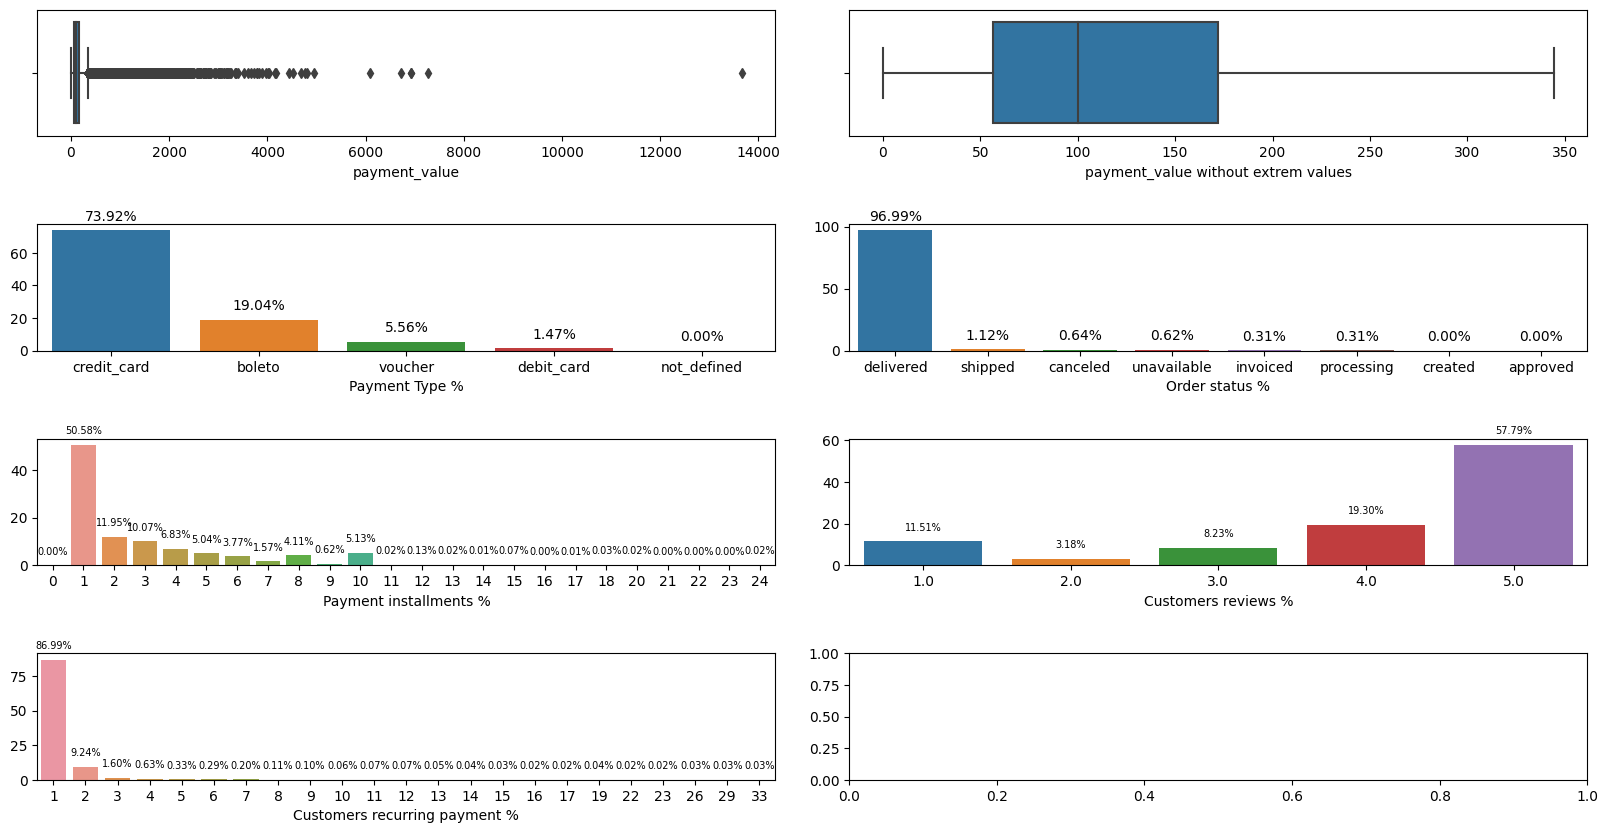

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
import my_functions



def annotate_barplot(ax, size = 10):
    for p in ax.patches:
        height = p.get_height()
        ax.annotate('{:.2f}%'.format(height),
                    (p.get_x() + p.get_width() / 2., height),
                    ha='center', va='center',
                    xytext=(0, 10), textcoords='offset points',
                    fontsize=size, color='black')

def my_sns_barplot(column, ax_i = 0, ax_j = 0, xlabel = "", ylabel = "", xrotation = 0, yrotation = 0, annotate = False, annotate_size = 10, rotation = 0):
    sns.barplot(x=column.index, y=column.values, ax = ax[ax_i][ax_j])
    ax[ax_i][ax_j].set_xlabel(xlabel)
    ax[ax_i][ax_j].set_xticklabels(ax[ax_i][ax_j].get_xticklabels(), rotation=rotation)
    if annotate == True:
        annotate_barplot(ax[ax_i][ax_j], size=annotate_size)


fig, ax = plt.subplots(4, 2, figsize=(20, 10))
fig.subplots_adjust(wspace=0.1, hspace=0.7)

sns.boxplot(x = 'payment_value', data = Merge_customers_order_payment, showfliers = True, ax=ax[0][0])
ax[0][0].set_xlabel('payment_value')

sns.boxplot(x = 'payment_value', data = Merge_customers_order_payment, showfliers = False, ax=ax[0][1])
ax[0][1].set_xlabel('payment_value without extrem values')

payment_counts_percentage = my_functions.counts_in_percentages(Merge_customers_order_payment['payment_type'])
my_sns_barplot(payment_counts_percentage, ax_i=1, ax_j=0, annotate= True, annotate_size=10, xlabel="Payment Type %", rotation=0)

order_status_percentage = my_functions.counts_in_percentages(Merge_customers_order_payment['order_status'])
my_sns_barplot(order_status_percentage, ax_i=1, ax_j=1, annotate= True, annotate_size=10, xlabel="Order status %", rotation=0)

payment_installments_percentage = my_functions.counts_in_percentages(Merge_customers_order_payment['payment_installments'])
my_sns_barplot(payment_installments_percentage, ax_i=2, ax_j=0, annotate= True, annotate_size=7, xlabel="Payment installments %", rotation=0)

customers_reviews_percentage = my_functions.counts_in_percentages(Merge_customers_reviews_no_duplicates['review_score'])
my_sns_barplot(customers_reviews_percentage, ax_i=2, ax_j=1, annotate= True, annotate_size=7, xlabel="Customers reviews %", rotation=0)

Merge_customers_order_payment_percentage = my_functions.counts_in_percentages(Merge_customers_order_payment['frequency'])
my_sns_barplot(Merge_customers_order_payment_percentage, ax_i=3, ax_j=0, annotate= True, annotate_size=7, xlabel="Customers recurring payment %", rotation=0)


fig.show()


c:\Users\Apprenant\Documents\Olist\Anlayse_Emad\my_functions.py:39: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_grouped = df.groupby(df['order_purchase_timestamp'].dt.date).mean()
c:\Users\Apprenant\Documents\Olist\Anlayse_Emad\my_functions.py:48: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_grouped = df_2017.groupby(df_2017['order_purchase_timestamp'].dt.date).mean()


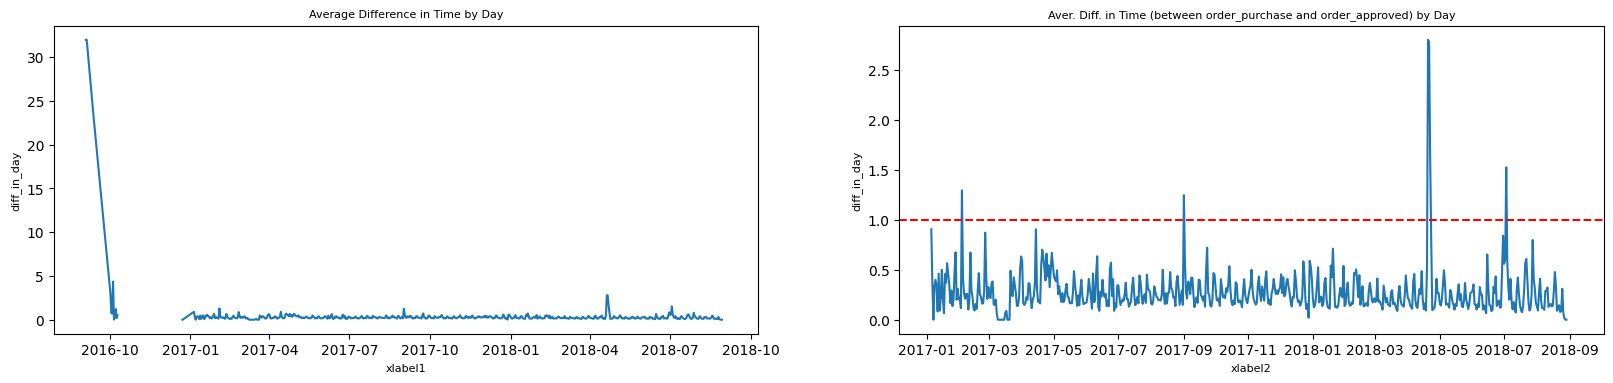

In [16]:
Merge_customers_order_payment = my_functions.difference_in_time(df = Merge_customers_order_payment, date1='order_purchase_timestamp', date2 = 'order_approved_at', new_column_name='diff_in_day', time_unit='day')

my_functions.plot_two_plots(Merge_customers_order_payment, "Average Difference in Time by Day", "Aver. Diff. in Time (between order_purchase and order_approved) by Day",
                xlabel1='xlabel1', xlabel2='xlabel2', fontsize=8, rotation=15)


<AxesSubplot: >

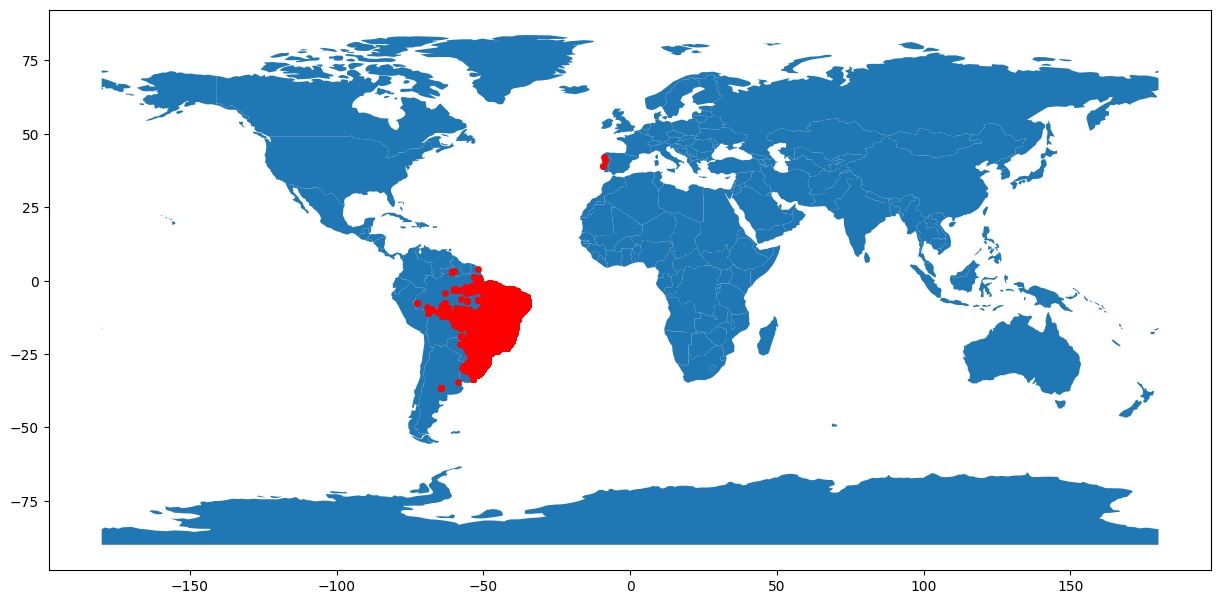

In [12]:
import pandas as pd
from shapely.geometry import Point
import geopandas as gpd
from geopandas import GeoDataFrame
import folium


geometry = [Point(xy) for xy in zip(customers_dataset_merged_with_geo['geolocation_lng'], customers_dataset_merged_with_geo['geolocation_lat'])]
gdf = GeoDataFrame(customers_dataset_merged_with_geo, geometry=geometry)   

#this is a simple map that goes with geopandas
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
gdf.plot(ax=world.plot(figsize=(15, 10)), marker='o', color='red', markersize=15)

In [13]:
states_counts = pd.DataFrame(customers_dataset_merged_with_geo['customer_state'].value_counts().reset_index())
#states_counts

In [14]:
import json 
geo = json.load(open("br_states.json")) # lire les données


m = folium.Map(location=[customers_dataset_merged_with_geo['geolocation_lat'].mean(), customers_dataset_merged_with_geo['geolocation_lng'].mean()], zoom_start=4)
folium.TileLayer('stamentoner').add_to(m) # Sets Tile Theme to (Dark Theme)
folium.Choropleth(geo_data = geo).add_to(m)


# plotting the choropleth
legends = 'Victims in Absolute Number '
choropleth = folium.Choropleth(
    geo_data=geo,
    data=states_counts,
    name=legends,
    columns=['index','customer_state'],
    key_on='feature.id',
    fill_color='YlOrRd',
    fill_opacity=1.0,
    line_opacity=0.7,
    legend_name=legends
).add_to(m)

df_indexed = states_counts.set_index('index')
for feature in choropleth.geojson.data['features']:
    state_name = feature['id']
    feature['properties']['counts'] = 'Counts: ' + '{:,}'.format(df_indexed.loc[state_name, 'customer_state']) if state_name in list(df_indexed.index) else ''
    #feature['properties']['per_100k'] = 'Reports/100K Population: ' + str(round(df_indexed.loc[state_name, 'Reports per 100K-F&O together'][0])) if state_name in list(df_indexed.index) else ''

choropleth.geojson.add_child(
    folium.features.GeoJsonTooltip(['name', 'counts'], labels=False)
)

m.save("br.html")